# 重み付きグラフ

## 重み付きグラフ：問題にチャレンジする前に


ファイルからグラフを構築し描画する関数を作っておく。各関数は`sol='mst`とすると最小全域木，`sol='ssdp'`とすると単一始点最短経路木を描画する。

対応するパターン

| ファイル名  | 関数             | グラフ | パターン             | 問題                                                                                                                                                                     |
|---------------|---------------|---------------|---------------|---------------|
| input-e.dat | `draw_pattern_e` | 無向   | エッジ/行，重みあり  | [A67](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bo), [A64](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bl)                             |
| input-f.dat | `draw_pattern_f` | 無向   | 隣接行列，重みあり   | [ALDS1_12_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_A)                                                                                      |
| input-g.dat | `draw_pattern_g` | 有向   | 隣接リスト，重みあり | [ALDS1_12_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_B), [ALDS1_12_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_C) |

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 入力：エッジ/行
def draw_pattern_a():
  with open('input-a.dat', 'r') as f:
    input = f.readline # 標準入力の場合と合わせるため
    n, m = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(1, 1 + n)) # エッジをもたないノードがあり得るため
    for _ in range(m):
      u, v = map(int, input().split())
      G.add_edge(u, v)
    draw(G)


# 入力：隣接リスト
def draw_pattern_b():
  with open('input-b.dat', 'r') as f:
    n = int(f.readline())
    G = nx.DiGraph()
    for _ in range(n):
      u, k, *x = map(int, input().split())
      for v in x: G.add_edge(u, v)
    draw(G)


# 実行中にエッジが追加される。
def draw_pattern_c():
  with open('input-c.dat', 'r') as f:
    input = f.readline
    n, q = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(1, 1 + n))
    for _ in range(q):
      t, u, v = map(int, input().split())
      if t == 1:
        G.add_edge(u, v)
        draw(G)


# 入力：エッジ/行。その後，パスの存在確認
def draw_pattern_d():
  with open('input-d.dat', 'r') as f:
    input = f.readline
    n, m = map(int, input().split())
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for _ in range(m):
      u, v = map(int, input().split())
      G.add_edge(u, v)
    draw(G)


def draw(G, *, highlight_edges=None, edge_labels=False):
  pos = nx.spring_layout(G, seed=42)
  plt.figure(figsize=(6, 4))

  nx.draw(G, pos, with_labels=True, node_color='greenyellow', width=1)

  if highlight_edges:
    nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, width=3)

  if edge_labels:
    labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5)

  plt.show()


# 最小全域木
def draw_mst(G):
    edges = nx.minimum_spanning_tree(G, weight='weight').edges()
    draw(G, highlight_edges=edges, edge_labels=True)


# 単一始点最短経路
def draw_ssdp(G, start=0):
    paths = nx.single_source_dijkstra_path(G, start, weight='weight')
    edges = set()
    for path in paths.values():  edges.update(zip(path, path[1:]))
    draw(G, highlight_edges=edges, edge_labels=True)


# 入力：エッジの重み/行
def draw_pattern_e(sol=None, start=0):
  with open('input-e.dat', 'r') as f:
    input = f.readline
    n, m = map(int, input().split())
    G = nx.Graph()
    for _ in range(m):
      u, v, w = map(int, input().split())
      G.add_edge(u, v, weight=w)
    if sol == 'mst': draw_mst(G)
    elif sol == 'ssdp': draw_ssdp(G, start)
    else: draw(G, edge_labels=True)


# 入力：隣接行列（エッジ無しは-1）
def draw_pattern_f(sol=None, start=0):
  with open('input-f.dat', 'r') as f:
    input = f.readline
    n = int(input())
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in range(n):
      for v, w in enumerate(map(int, input().split())):
        if w != -1: G.add_edge(u, v, weight=w)
    if sol == 'mst': draw_mst(G)
    elif sol == 'ssdp': draw_ssdp(G, start)
    else: draw(G, edge_labels=True)

# 入力：隣接リスト（重みあり）
def draw_pattern_g(sol=None, start=0):
  with open('input-g.dat', 'r') as f:
    input = f.readline
    n = int(input())
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for _ in range(n):
      u, k, *x = map(int, input().split())
      for j in range(k):
        G.add_edge(u, x[2 * j], weight=x[2 * j + 1])
    if sol == 'mst': draw_mst(G)
    elif sol == 'ssdp': draw_ssdp(G, start)
    else: draw(G, edge_labels=True)

## 最小全域木

### ♥networkxを使う


♠♥問題：[A67 - MST (Minimum Spanning Tree)](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bo)

In [2]:
%%writefile input-e.dat
7 9
1 2 12
1 3 10
2 6 160
2 7 15
3 4 1
3 5 4
4 5 3
4 6 120
6 7 14

Writing input-e.dat


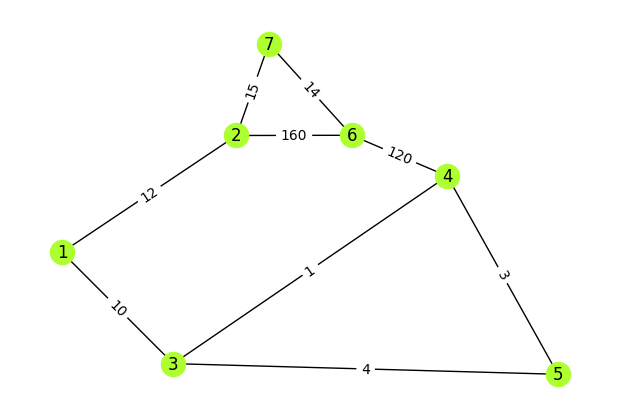

In [3]:
draw_pattern_e()

紙とペンで，このグラフのMSTを求めてみよう。

MSTには複数の可能性があり得るが，重みの総和は同じになる。

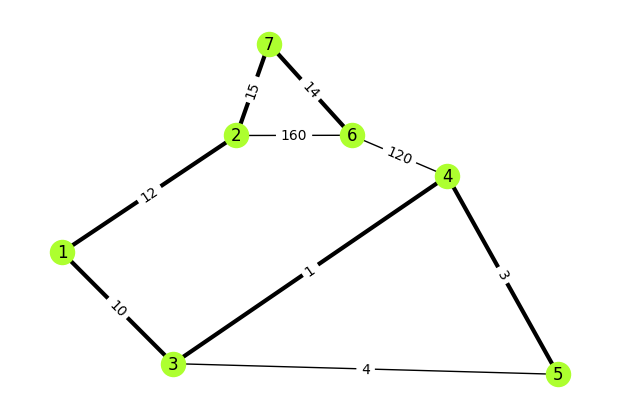

In [4]:
draw_pattern_e(sol='mst')

networkxにはMSTを求める関数`nx.minimum_spanning_tree`がある。それを使えば，入力例には対応できる。（本番ではTLEになるかもしれない。）

In [5]:
%%writefile test.py
import networkx as nx

n, m = map(int, input().split())
G = nx.Graph()
for _ in range(m):
  u, v, w = map(int, input().split())
  G.add_edge(u, v, weight=w)

mst = nx.minimum_spanning_tree(G, weight="weight")
total_weight = mst.size(weight="weight")
print(int(total_weight))

Writing test.py


In [6]:
!python test.py < input-e.dat

55


### ♦networkxを使わない


♦問題：[ALDS1_12_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_A) (Minimum Spanning Tree I)

教科書の図13.7を再現する。次の点に注意。

-   1でノード0はGLEYにならない。
-   一度GLEYになったノードはWHITEには戻らない。

In [7]:
%%writefile input-f.dat
7
 -1 10 3 -1 18 11 -1
 10 -1 5 1 -1 -1 -1
 3 5 -1 2 -1 7 5
 -1 1 2 -1 -1 -1 2
 18 -1 -1 -1 -1 1 -1
 11 -1 7 -1 1 -1 2
 -1 -1 5 2 -1 2 -1

Writing input-f.dat


♠ここでは試さないが，networkxを使う場合，隣接行列`m`を作って，`G = nx.from_numpy_array(m)`としたいところだが，この問題では重み0のエッジがあるのに対して，`nx.from_numpy_array`は重み0をエッジとみなさないため，工夫が必要である。

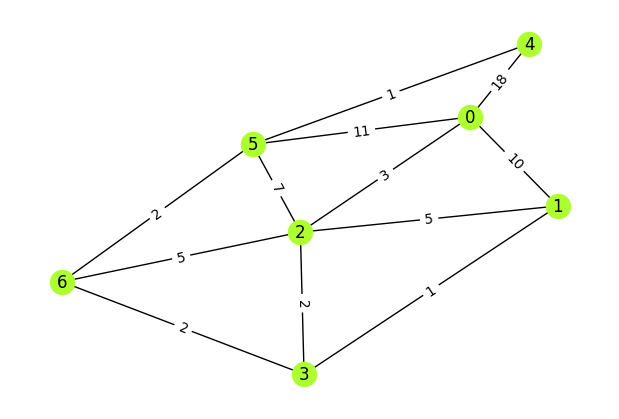

In [8]:
draw_pattern_f()

紙とペンで，このグラフのMSTを求めてみよう。

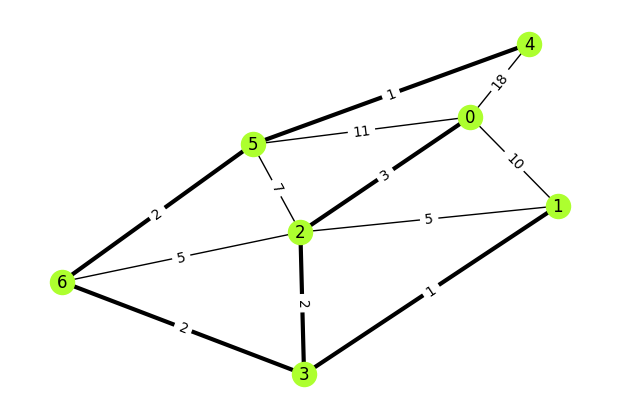

In [9]:
draw_pattern_f(sol='mst')

プリムのアルゴリズムを実装する。

In [14]:
%%writefile test.py
def prim(M):
  INFTY = (1<<22)
  WHITE, GRAY, BLACK = 0, 1, 2
  n = len(M)
  d = [INFTY] * n
  p = [None] * n
  color = [WHITE] * n

  d[0] = 0
  p[0] = -1

  while True:
    mincost = INFTY#コスト最小ノードを探す
    for i in range(n):
      if color[i] != BLACK and d[i] < mincost:
        mincost = d[i]
        u = i

    if mincost == INFTY: break

    color[u] = BLACK#コスト最小ノードは確定

    for v in range(n):
      if color[v] != BLACK and M[u][v] >= 0:
        if M[u][v] < d[v]:
          d[v] = M[u][v]
          p[v] = u#ここの行は実はいらない
          color[v] = GRAY#ここの行は実はいらない
  return d


n = int(input())
M = [list(map(int, input().split())) for _ in range(n)]

d = prim(M)
print(sum(d))

Overwriting test.py


In [15]:
!python test.py < input-f.dat

11


## 単一始点最短経路


アルゴリズム図鑑

### ♥networkxを使う


♥問題：[A64 - Shortest Path 2](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bl)

In [16]:
%%writefile input-e.dat
6 7
1 2 15
1 4 20
2 3 65
2 5 4
3 6 50
4 5 30
5 6 8

Overwriting input-e.dat


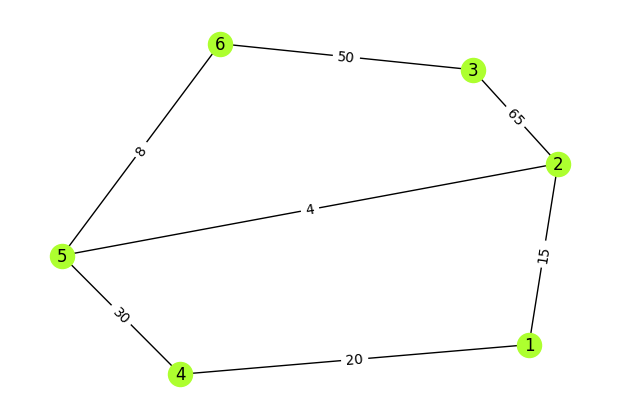

In [17]:
draw_pattern_e()

紙とペンで，ノード1を起点とする単一始点最短経路を求めてみよう。

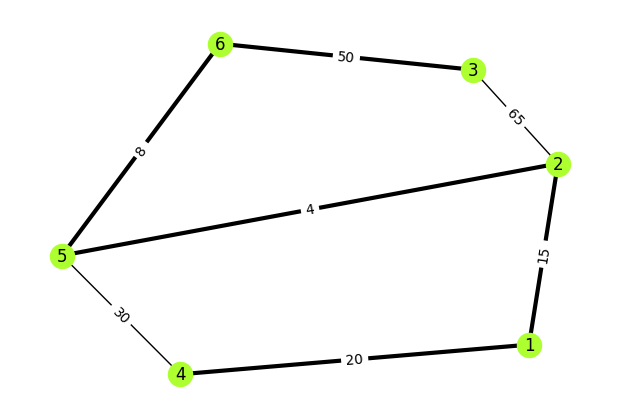

In [18]:
draw_pattern_e(sol='ssdp', start=1)

networkxには単一始点最短経路長を求める関数`nx.single_source_shortest_path_length`がある。

In [19]:
%%writefile test.py
import networkx as nx
n, m = map(int, input().split())
G = nx.Graph()
G.add_nodes_from(range(1, n + 1))
for _ in range(m):
  u, v, w = map(int, input().split())
  G.add_edge(u, v, weight=w)
result = nx.single_source_dijkstra_path_length(G, 1, weight='weight')
for u in range(1, n + 1): print(result.get(u, -1))

Overwriting test.py


In [20]:
!python3 test.py < input-e.dat

0
15
77
20
19
27


### ♦networkxを使わない


-   ♦問題：[ALDS1_12_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_B) (Single Source Shortest Path I)
-   ♠♦問題：[ALDS1_12_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_C) (Single Source Shortest Path II)

教科書の図13.11を再現する。

In [21]:
%%writefile input-g.dat
7
0 4 1 10 2 3 4 18 5 11
1 3 0 10 2 5 3 1
2 5 0 3 1 5 3 2 5 7 6 5
3 3 1 1 2 2 6 2
4 2 0 18 5 1
5 4 0 11 2 7 4 1 6 2
6 3 2 5 3 2 5 2

Writing input-g.dat


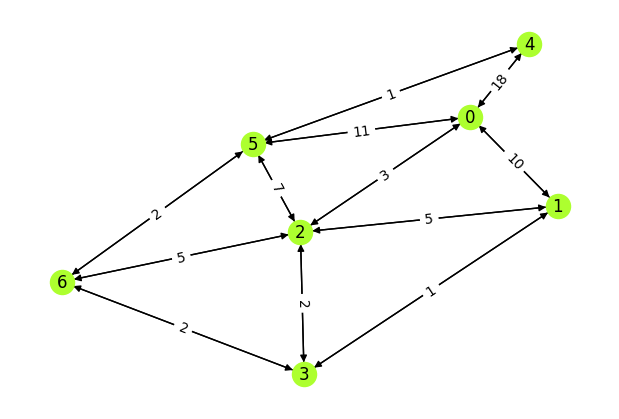

In [22]:
draw_pattern_g()

紙とペンで，ノード0を起点とする単一始点最短経路を求めてみよう。

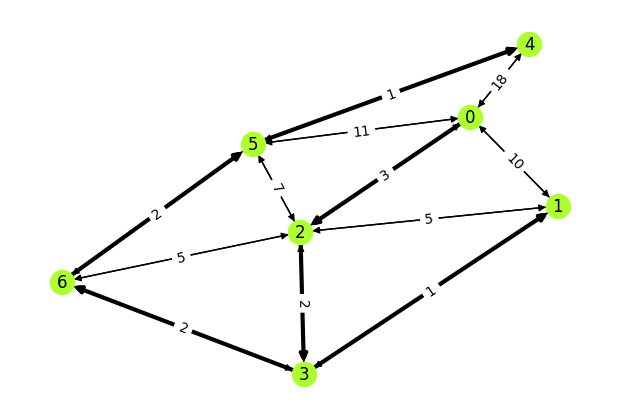

In [23]:
draw_pattern_g(sol='ssdp')

ダイクストラのアルゴリズムを実装する。

In [24]:
%%writefile test.py
def dijkstra(M):
  INFTY = (1<<22)
  WHITE, GRAY, BLACK = 0, 1, 2
  n = len(M)
  d = [INFTY] * n
  p = [None] * n
  color = [WHITE] * n

  d[0] = 0
  p[0] = -1

  while True:
    mincost = INFTY
    for i in range(n):
      if color[i] != BLACK and d[i] < mincost:
        mincost = d[i]
        u = i

    if mincost == INFTY: break

    color[u] = BLACK

    for v in range(n):
      if color[v] != BLACK and M[u][v] >= 0:
        if d[u] + M[u][v] < d[v]:
          d[v] = d[u] + M[u][v]
          p[v] = u
          color[v] = GRAY
  return d

n = int(input())
M = [[-1] * n for _ in range(n)]
for _ in range(n):
  u, k, *x = map(int, input().split())
  for j in range(k):
    v = x[2 * j]
    w = x[2 * j + 1]
    M[u][v] = w

d = dijkstra(M)
for u in range(n): print(u, d[u])

Overwriting test.py


In [25]:
!python test.py < input-g.dat

0 0
1 6
2 3
3 5
4 10
5 9
6 7


## プリムのアルゴリズムとダイクストラのアルゴリズム

### 似ているところ


構造はほとんど同じ。

プリムのアルゴリズム（一部）

``` python
    for v in range(n):
      if color[v] != BLACK and M[u][v] >= 0:
        if M[u][v] < d[v]: # 辺がコストより小さければ
          d[v] = M[u][v]     # コストを更新する。
```

ダイクストラのアルゴリズム（一部）

``` python
    for v in range(n):
      if color[v] != BLACK and M[u][v] >= 0:
        if d[u] + M[u][v] < d[v]: # 辺が暫定の最短経路長より短ければ
          d[v] = d[u] + M[u][v]     # 最短経路長を更新する。
```

### 違うところ


プリムのアルゴリズムは最小全域木，ダイクストラのアルゴリズムは最短経路木を作る。最小全域木と最短経路木は異なる。

In [26]:
%%writefile input-e.dat
8 15
0 1 3
0 2 5
1 2 1
1 3 10
1 4 11
2 3 2
2 4 3
3 4 2
3 5 7
3 6 12
4 5 11
4 6 2
5 6 3
5 7 2
6 7 2

Overwriting input-e.dat


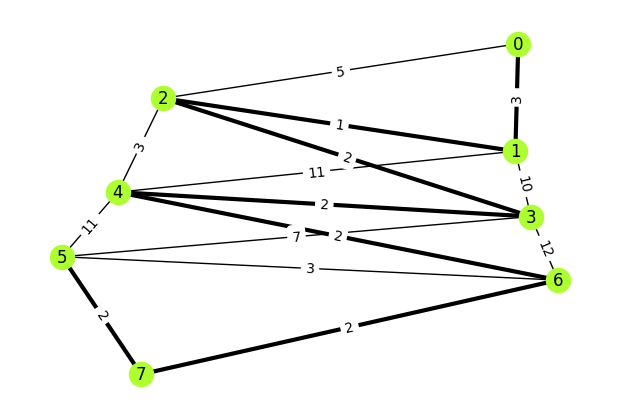

In [27]:
draw_pattern_e(sol='mst')

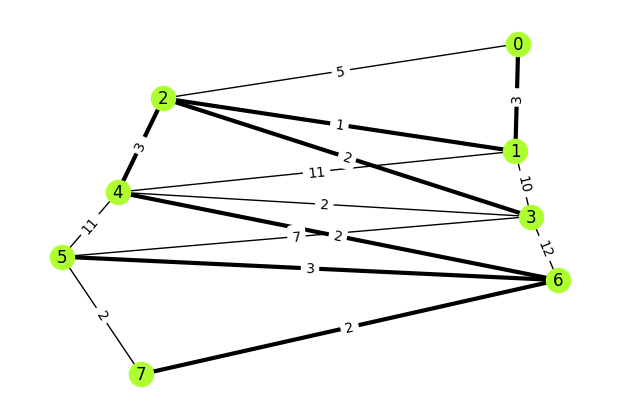

In [28]:
draw_pattern_e(sol='ssdp', start=0)

## 宿題


以下の問題をAC（Accepted）にする。Pythonを使うこと。

networkxの使い方を学びたい（手軽）。

-   ♠♥[A67 - MST (Minimum Spanning Tree)](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bo)
-   ♥[A64 - Shortest Path 2](https://atcoder.jp/contests/tessoku-book/tasks/tessoku_book_bl)

アルゴリズムを自分で実装したい。

-   ♦[ALDS1_12_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_A) (Minimum Spanning Tree I)
-   ♦[ALDS1_12_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_B) (Single Source Shortest Path I)
-   ♠♦[ALDS1_12_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/12/ALDS1_12_C) (Single Source Shortest Path II)

以上